In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [31]:
#Load data
df_data = pd.read_csv('data_ecommerce.csv')

In [25]:
df_data.head(5)

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Year,Month
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,2018,4
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,2018,4
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,2018,4
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,2018,4
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,2018,4


In [6]:
df_data.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333
std,461.050488,169.140565,2.184942
min,4.000000,-1981.000000,1.000000
25%,45.000000,-9.250000,2.000000
50%,118.000000,9.000000,3.000000
75%,322.000000,38.000000,5.000000
max,5729.000000,1698.000000,14.000000


In [10]:
#check null values
df_data.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Order Date    1500 non-null   object 
 2   CustomerName  1500 non-null   object 
 3   State         1500 non-null   object 
 4   City          1500 non-null   object 
 5   Amount        1500 non-null   float64
 6   Profit        1500 non-null   float64
 7   Quantity      1500 non-null   int64  
 8   Category      1500 non-null   object 
 9   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 117.3+ KB


In [33]:
#change type column Order date 

df_data['Order Date'] = pd.to_datetime(df_data['Order Date'])
df_data['Year'] = df_data['Order Date'].dt.year
df_data['Month_number'] = df_data['Order Date'].dt.month
df_data['Month'] = df_data['Month_number'].apply(lambda x: calendar.month_abbr[x])

In [34]:
df_data.head(2)

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Year,Month_number,Month
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,2018,4,Apr
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,2018,4,Apr


In [40]:
df_data.groupby(['Year','Month_number','Month']).agg({'Amount':'sum', 'Profit':'sum', 'Quantity':'sum'}).reset_index()

,Year,Month_number,Month,Amount,Profit,Quantity
0,2018,4,Apr,32726.0,-3960.0,389
1,2018,5,May,28545.0,-3584.0,423
2,2018,6,Jun,23658.0,-4970.0,369
3,2018,7,Jul,12966.0,-2138.0,240
4,2018,8,Aug,30899.0,-2180.0,446
5,2018,9,Sep,26628.0,-4963.0,331
6,2018,10,Oct,31615.0,3093.0,419
7,2018,11,Nov,48086.0,11619.0,578
8,2018,12,Dec,37579.0,5284.0,412
9,2019,1,Jan,61439.0,9760.0,745


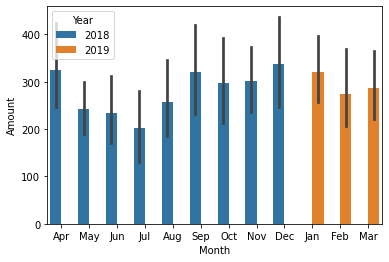

In [72]:
#Visualisasi Monthly Amount
sns.barplot(x = 'Month', y='Amount', hue ='Year',data=df_data);

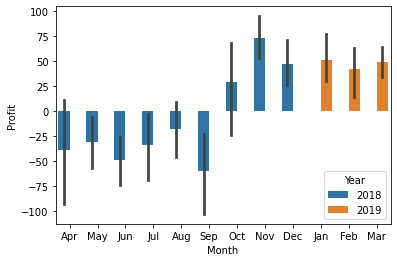

In [71]:
#Visualisasi Monthly Profit
sns.barplot(x = 'Month', y='Profit', hue ='Year',data=df_data);

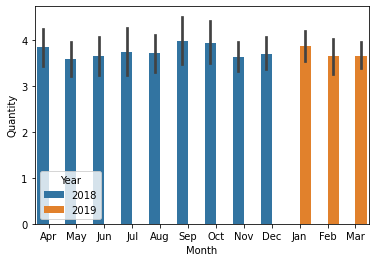

In [74]:
#Visualisasi Monthly Quantity
sns.barplot(x ='Month', y='Quantity', hue ='Year', data=df_data);

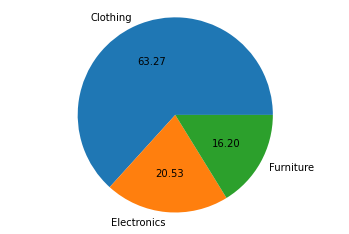

In [112]:
#Visualisasi Category
category = df_data['Category'].value_counts().reset_index()
plt.pie(category['Category'],
        labels=category['index'],
       autopct='%.2f')
plt.axis('equal')
plt.show()

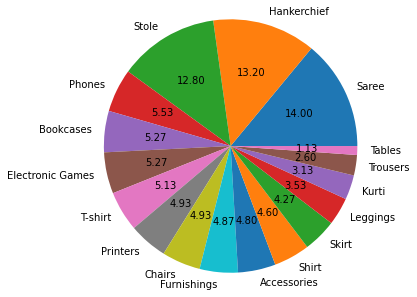

In [121]:
#Visualisasi SubCategory
plt.figure(figsize=(5,5))
subcategory = df_data['Sub-Category'].value_counts().reset_index()
plt.pie(subcategory['Sub-Category'], labels=subcategory['index'], 
        autopct='%.2f')
plt.axis('equal')
plt.show()

In [150]:
#Customer Demographic Analysis
Total_Order = df_data[['City','State']]
Total_Order['Count_City'] = Total_Order['City']
Total_Order['Count_State'] = Total_Order['State']

Order_City = Total_Order.groupby(['City']).agg({'Count_City':'count'}).reset_index().sort_values('Count_City', ascending = False)
Order_State = Total_Order.groupby(['State']).agg({'Count_State':'count'}).reset_index().sort_values('Count_State', ascending = False)

C:\Users\user\AppData\Local\Temp/ipykernel_10376/1082125299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_Order['Count_City'] = Total_Order['City']
C:\Users\user\AppData\Local\Temp/ipykernel_10376/1082125299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_Order['Count_State'] = Total_Order['State']


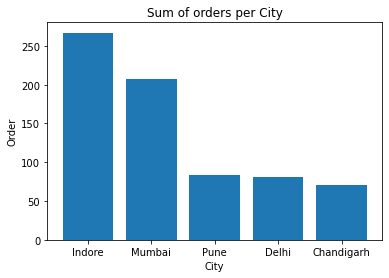

In [239]:
City_Top5 = Order_City.head(5)
plt.bar(City_Top5['City'], City_Top5['Count_City'])
plt.xlabel('City')
plt.ylabel('Order')
plt.title('Sum of orders per City')
plt.show()

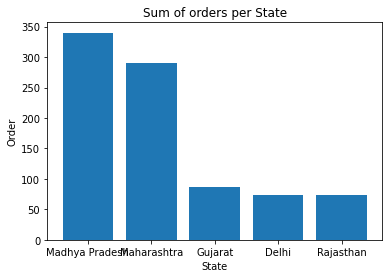

In [238]:
State_Top5 = Order_State.head(5)
plt.bar(State_Top5['State'], State_Top5['Count_State'])
plt.xlabel('State')
plt.ylabel('Order')
plt.title('Sum of orders per State')
plt.show()

In [152]:
df_data

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Year,Month_number,Month
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,2018,4,Apr
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,2018,4,Apr
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,2018,4,Apr
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,2018,4,Apr
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,2018,4,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones,2019,3,Mar
1496,B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers,2019,3,Mar
1497,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828.0,230.0,2,Furniture,Chairs,2019,3,Mar
1498,B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34.0,10.0,2,Clothing,T-shirt,2019,3,Mar


In [158]:
feature = df_data.groupby(['CustomerName']).agg({'Amount':sum, 'Quantity':'sum'}).reset_index()
seg = feature.iloc[:,1:3]

In [240]:
# KMeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(seg)

KMeans(n_clusters=3)

In [241]:
feature['Segmentasi'] = model.labels_ + 1
feature.head(5)

,CustomerName,Amount,Quantity,Segmentasi
0,Aakanksha,74.0,8,2
1,Aarushi,4701.0,49,1
2,Aashna,1931.0,32,3
3,Aastha,3276.0,28,3
4,Aayush,556.0,18,2


In [242]:
feature['Segmentasi'].value_counts().reset_index().sort_values('index')

,index,Segmentasi
2,1,22
0,2,222
1,3,88


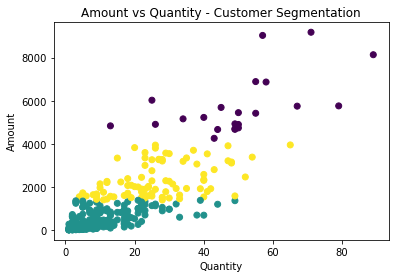

In [243]:
plt.scatter(x=feature['Quantity'], y=feature['Amount'], c=feature['Segmentasi'])
plt.title('Amount vs Quantity - Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.show()